In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv')
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [2]:
print("data null \n",credit.isnull().sum())
print("\ndata kosong \n",credit.empty)
print("\nndata nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

data kosong 
 False

ndata nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [5]:
df_credit=credit.drop(['Sl_No', 'Customer Key'], axis=1)
df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

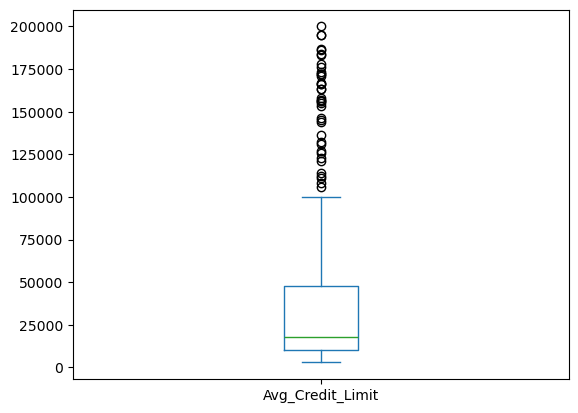

In [6]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah baris Data sebelum dibuang outlier 660
Jumlah baris Data sesudah dibuang outlier 621


<Axes: >

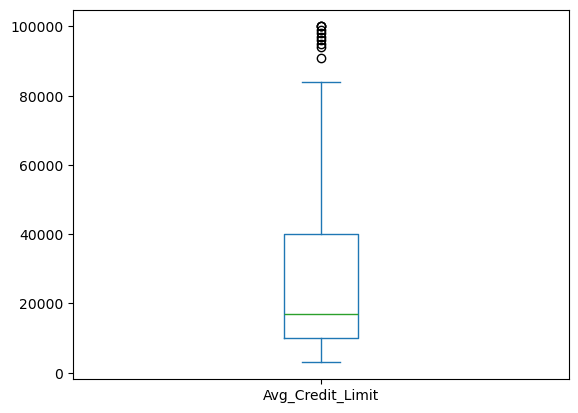

In [7]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    if is_numeric_dtype(data_frame[kolom_outlier]):
        q1 = data_frame[kolom_outlier].quantile(0.25)
        q3 = data_frame[kolom_outlier].quantile(0.75)

        iqr = q3-q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)

        df_out = data_frame.loc[(data_frame[kolom_outlier] >= batas_bawah) & (data_frame[kolom_outlier] <= batas_atas)]
    return df_out

credit_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')
print("Jumlah baris Data sebelum dibuang outlier", df_credit.shape[0])
print("Jumlah baris Data sesudah dibuang outlier", credit_bersih.shape[0])

credit_bersih['Avg_Credit_Limit'].plot(kind='box')

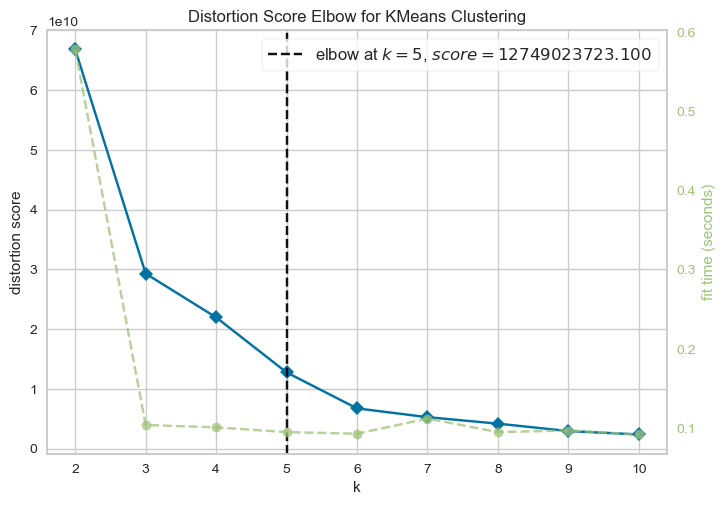

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

KMeansC = KMeans(random_state=77)
vis = KElbowVisualizer(KMeansC, k=(2,11))

vis.fit(credit_bersih)
vis.show()

Silhouette Score k-Means for  2  clusters : 0.7254150167909509
Silhouette Score k-Means for  3  clusters : 0.7058100919802311
Silhouette Score k-Means for  4  clusters : 0.5928895843252326
Silhouette Score k-Means for  5  clusters : 0.6039773808643728
Silhouette Score k-Means for  6  clusters : 0.6277644646724014
Silhouette Score k-Means for  7  clusters : 0.6229855664717416
Silhouette Score k-Means for  8  clusters : 0.6035680259620861
Silhouette Score k-Means for  9  clusters : 0.5989385053360569
Silhouette Score k-Means for  10  clusters : 0.6017575049440793


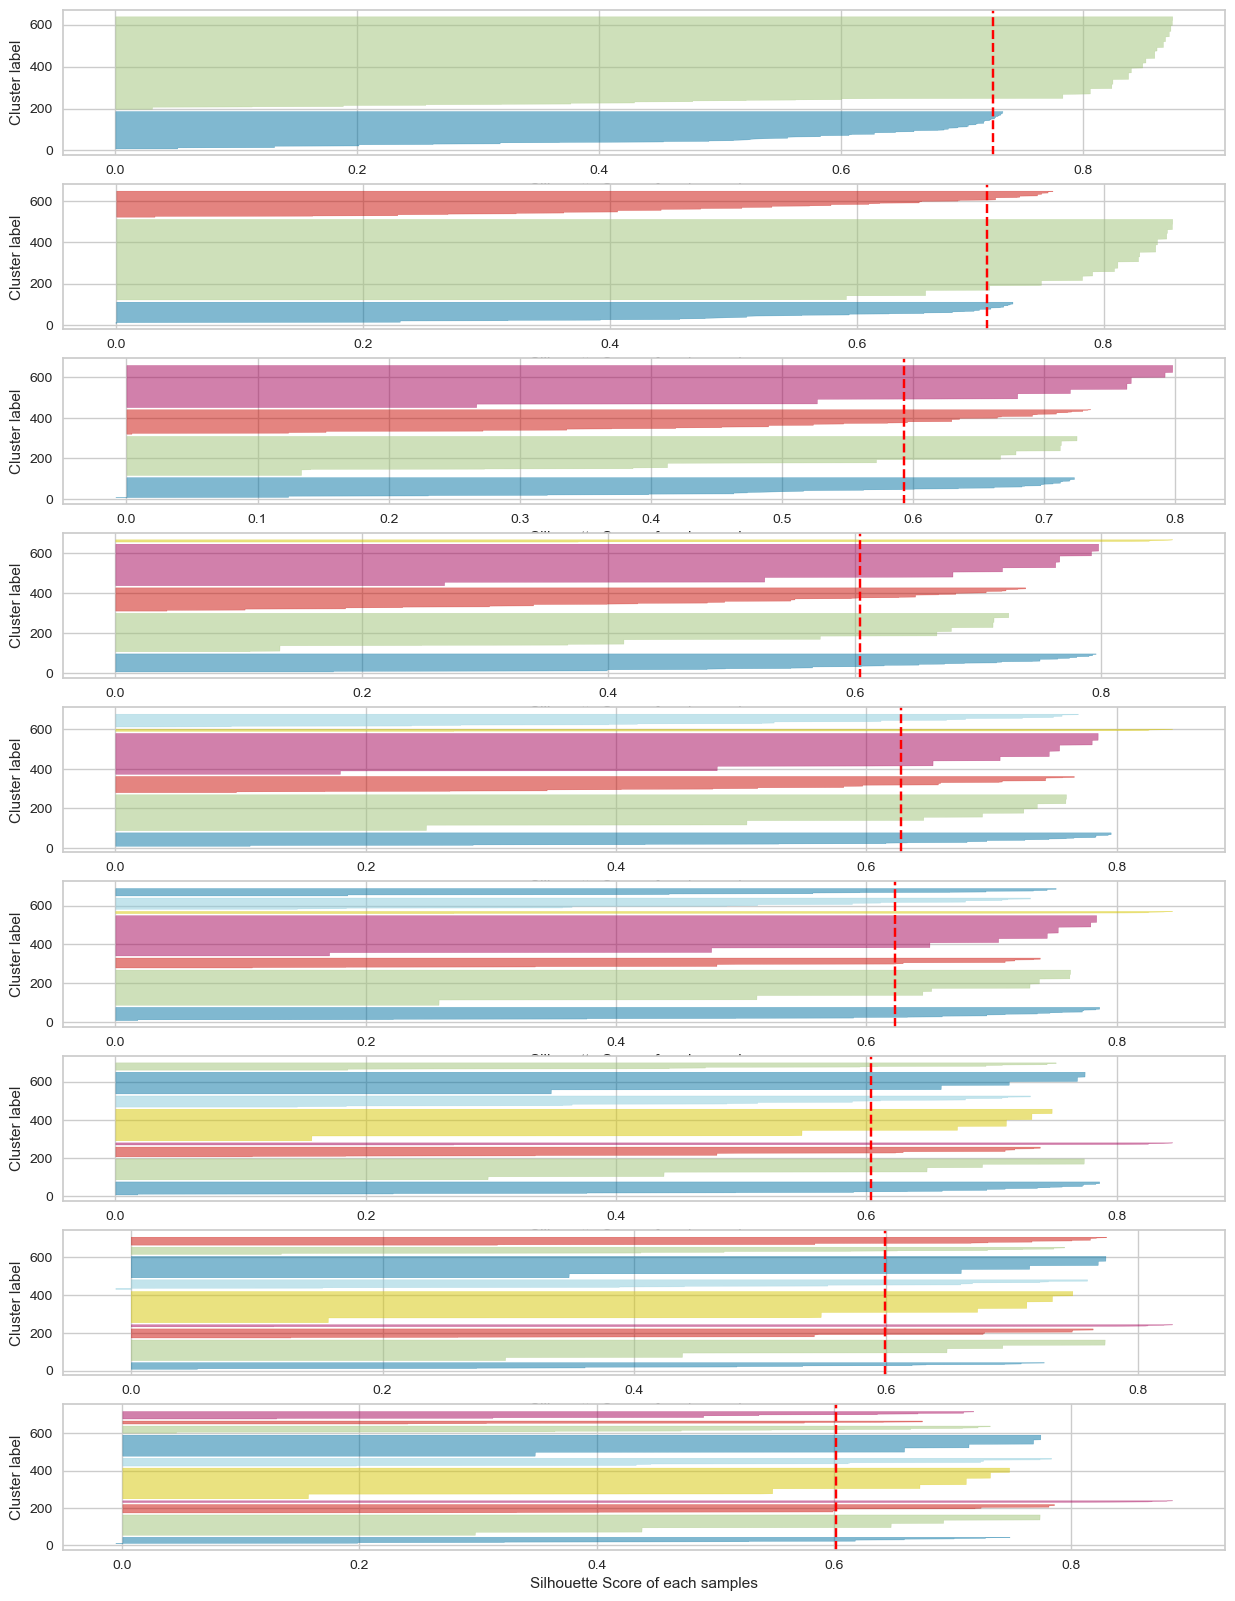

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    KMeansC = KMeans(n_clusters=k, init='k-means++', random_state=77)
    KM_clusters=KMeansC.fit_predict(credit_bersih)
    print("Silhouette Score k-Means for ", k, " clusters :", silhouette_score(credit_bersih, KM_clusters))

    sil_vis = SilhouetteVisualizer(KMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(credit_bersih)

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [11]:
credit_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

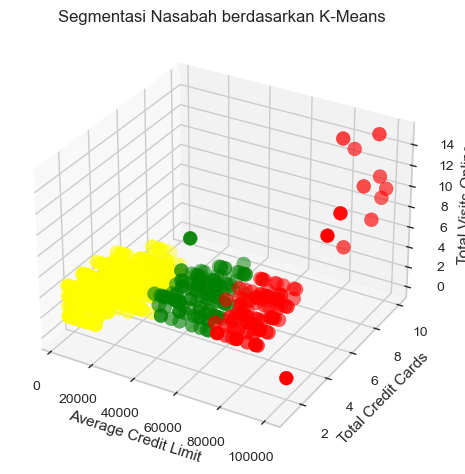

Silhouette Score K-Means: 0.706


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=77)
K_clusters = kmeans.fit_predict(credit_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(credit_bersih['Avg_Credit_Limit'], credit_bersih['Total_Credit_Cards'], credit_bersih['Total_visits_online'],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_bersih, K_clusters))

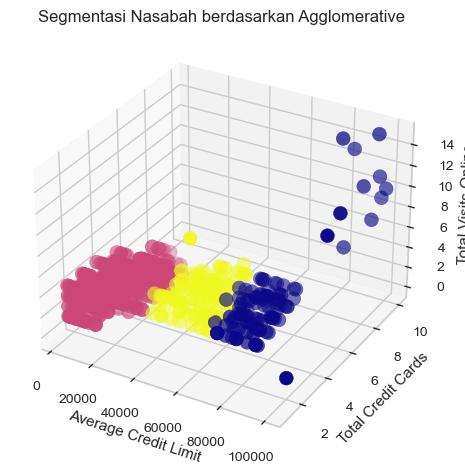

Silhouette Score K-Means: 0.705


In [15]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(credit_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_bersih['Avg_Credit_Limit'], credit_bersih['Total_Credit_Cards'], credit_bersih['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_bersih, AGG_clusters))

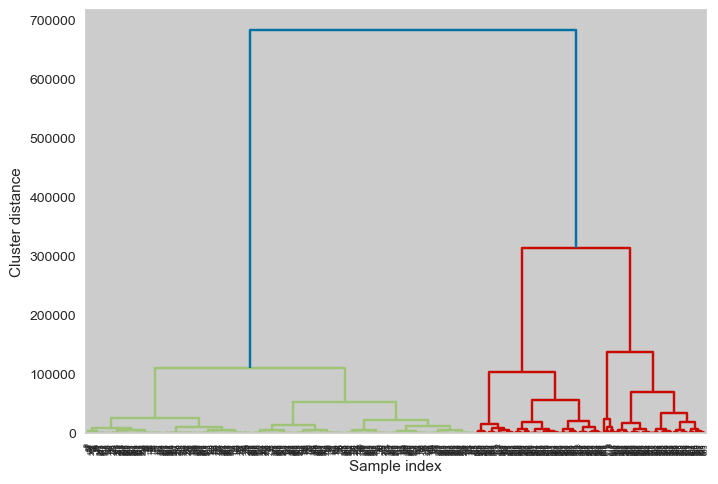

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(credit_bersih, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

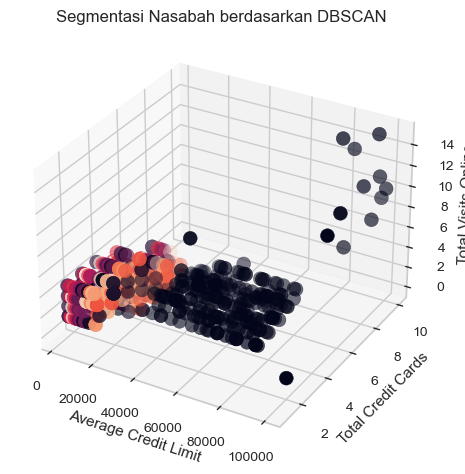

Silhouette Score K-Means: 0.581


In [18]:
DBSC = DBSCAN(min_samples=20, eps=250)

DBSC_clusters = DBSC.fit_predict(credit_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_bersih['Avg_Credit_Limit'], credit_bersih['Total_Credit_Cards'], credit_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_bersih, DBSC_clusters))

In [19]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
